In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dedup_lib.utils import makeCFwithStats

### Read Data and process Data

In [20]:
data_path = "featurizedData/featurizednGramsData.csv"
df0=pd.read_csv(data_path)

In [21]:
df1=df0[df0['isDuplicate']==0].sample(n=7000)
df2=df0[df0['isDuplicate']==1]

df=pd.concat([df1,df2])

In [22]:
df.head()

,w1,w2,count1,count2,total1,total2,isDuplicate,w1_number_of_words,w2_number_of_words,w1_unigram_a,...,w2_bigram_ q,w2_bigram_ r,w2_bigram_ s,w2_bigram_ t,w2_bigram_ u,w2_bigram_ v,w2_bigram_ w,w2_bigram_ x,w2_bigram_ y,w2_bigram_ z
28470,altamira rio piedros,las marias,1.0,1.0,1351.0,1351.0,0.0,3,2,3,...,0,0,0,0,0,0,0,0,0,0
15030,guinean franc,guyana dollar,1.0,1.0,263.0,263.0,0.0,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1593,"chicago, il 60613",san francisco/oakland or your ho,1.0,1.0,107093.0,107093.0,0.0,3,5,1,...,0,0,0,0,0,0,0,0,1,0
34868,elliminyt,north geelong,797.0,797.0,158026.0,158026.0,0.0,27,4,0,...,0,0,0,0,0,0,0,0,0,0
29856,new york,il,16089.0,16089.0,374362.0,374362.0,0.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isDuplicate','w1','w2','total1','total2','count1','count2'],axis=1), 
                                                    df['isDuplicate'], test_size=0.3)

## Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/home/sohampachpande/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


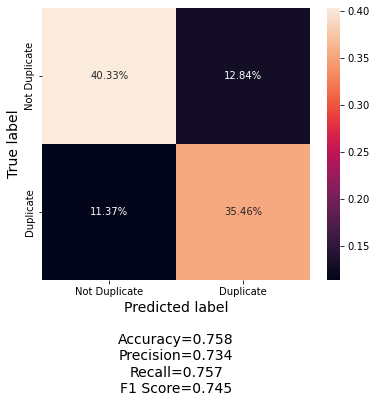

In [25]:
makeCFwithStats(predictions, y_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      2104
         1.0       0.73      0.76      0.75      1853

    accuracy                           0.76      3957
   macro avg       0.76      0.76      0.76      3957
weighted avg       0.76      0.76      0.76      3957

